## Clustering

In [10]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# import clustering algs
from sklearn.cluster import KMeans, DBSCAN

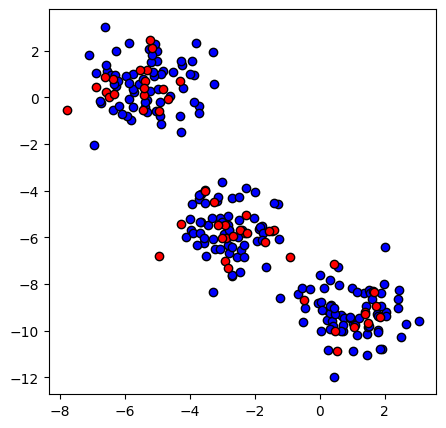

In [38]:
X, y = make_blobs(n_samples = 250, n_features = 2, random_state=16) #, centers = clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

_, ax = plt.subplots(figsize = (5,5))
ax.scatter( X_train[:, 0], X_train[:, 1], c = 'b', edgecolors='k')
ax.scatter( X_test[:, 0], X_test[:, 1], c = 'r', edgecolors='k')
plt.show()

In [24]:
# import decision boundaries function
def decisionBoundaries(model, X, num=100):
  import numpy as np
  offset=0.2
  x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
  y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
  x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, num), np.linspace(y_min, y_max, num))

  # Calcular las predicciones del modelo para la malla
  Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
  Z = Z.reshape(x_grid.shape)

  return x_grid, y_grid, Z

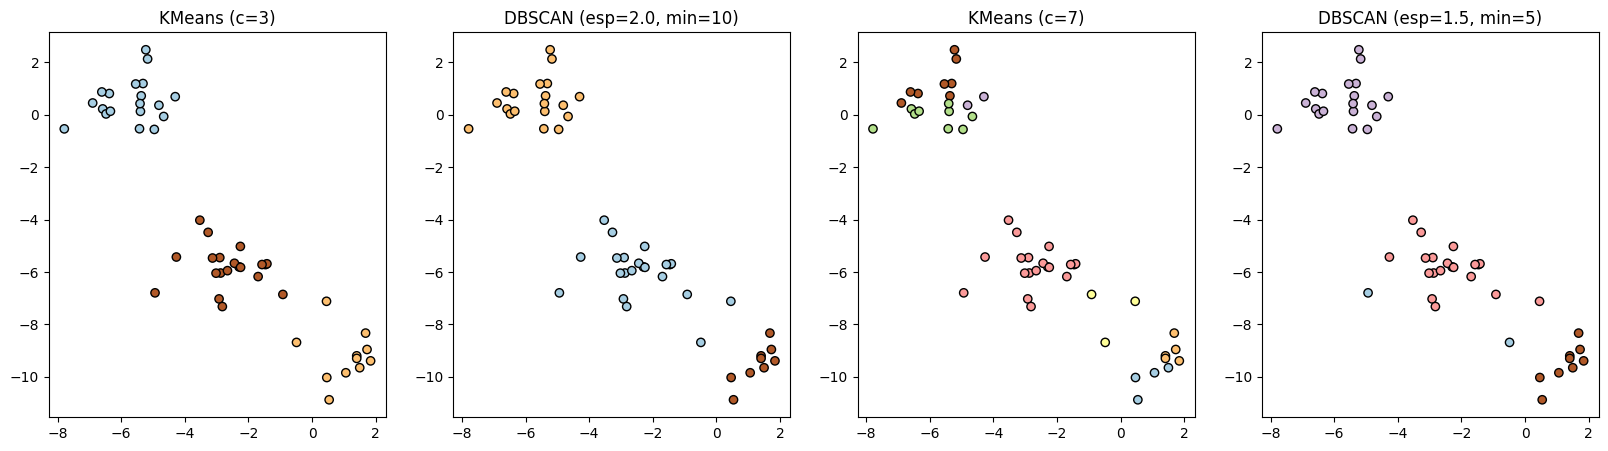

In [32]:
models = [ KMeans(n_clusters=3), DBSCAN(eps=2.0, min_samples=10),
          KMeans(n_clusters=7), DBSCAN(eps=1.5, min_samples=5)]

names = ['KMeans (c=3)', 'DBSCAN (esp=2.0, min=10)',
         'KMeans (c=7)', 'DBSCAN (esp=1.5, min=5)']

_, axes = plt.subplots(1, 4, figsize = (20,5))
preds = {}

# fit the model
for i, (model, name, ax) in enumerate(zip(models, names, axes)) :
    # Instance and train

    # Predictions on train and test sets
    if name.startswith('DBSCAN'):
      model.fit(X_test)
      preds[name] = model.labels_
    else:
      model.fit(X_train)
      preds[name] = model.predict(X_test)

    # Plot everything
    ax.scatter(X_test[:,0], X_test[:,1], c = preds[name], cmap='Paired', edgecolors='k')
    ax.set_title(name)

plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [35]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [41]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format(name))
  ari = adjusted_rand_score(y_test, preds[name])
  ami = adjusted_mutual_info_score( y_test, preds[name])
  sil = silhouette_score(y_test.reshape(-1, 1), preds[name])
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL -- \t")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for KMeans (c=3) -----########
-- ARI --	 -- AMI --	 -- SIL -- 	
  1.000  	   1.000  	   1.000  	
########----- Results for DBSCAN (esp=2.0, min=10) -----########
-- ARI --	 -- AMI --	 -- SIL -- 	
  0.896  	   0.882  	   0.882  	
########----- Results for KMeans (c=7) -----########
-- ARI --	 -- AMI --	 -- SIL -- 	
  0.669  	   0.714  	   0.320  	
########----- Results for DBSCAN (esp=1.5, min=5) -----########
-- ARI --	 -- AMI --	 -- SIL -- 	
  0.893  	   0.848  	   0.841  	


## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()